In [22]:
from __future__ import print_function

import datetime
import numpy as np
import pandas as pd
import pylab as pl
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
from hmmlearn import hmm

In [3]:
df=pd.read_hdf('data.h5','AAPL')

In [7]:
df

,Close,Open,High,Low,Volume
Date,,,,,
2017-03-09,138.679993,138.740005,138.789993,137.050003,22155900
2017-03-10,139.139999,139.250000,139.360001,138.639999,19612800
2017-03-13,139.199997,138.850006,139.429993,138.820007,17421700
2017-03-14,138.990005,139.300003,139.649994,138.839996,15309100
2017-03-15,140.460007,139.410004,140.750000,139.029999,25691800
2017-03-16,140.690002,140.720001,141.020004,140.259995,19232000
2017-03-17,139.990005,141.000000,141.000000,139.889999,43885000
2017-03-20,141.460007,140.399994,141.500000,140.229996,21542000
2017-03-21,139.839996,142.110001,142.800003,139.729996,39529900


In [10]:
a = np.array((1,2,3))
b = np.array((2,3,4))
np.column_stack((a,b))

array([[1, 2],
       [2, 3],
       [3, 4]])

In [17]:
a.shape

(3,)

In [15]:
diff.shape

(252,)

In [18]:
volume.shape

(253,)

In [42]:
252/4.0

63.0

In [44]:
"""
==========================
Gaussian HMM of stock data
==========================

This script shows how to use Gaussian HMM.
It uses stock price data, which can be obtained from yahoo finance.
For more information on how to get stock prices with matplotlib, please refer
to date_demo1.py of matplotlib.
"""




print(__doc__)

###############################################################################
# Downloading the data
date1 = df.index[0]  # start date
date2 = df.index[-1]  # end date
# get quotes from yahoo finance


# unpack quotes
dates = df.index
close_v = df['Close'].values
volume = df['Volume'].values[1:]

# Take diff of close value. Note that this makes
# ``len(diff) = len(close_t) - 1``, therefore, other quantities also
# need to be shifted by 1.
diff = np.diff(close_v)
dates = dates[1:]
close_v = close_v[1:]

# Pack diff and volume for training.
X = np.column_stack([diff, volume])


###############################################################################
# Run Gaussian HMM
print("fitting to HMM and decoding ...", end='')
n_components = 4

# make an HMM instance and execute fit
model = hmm.GaussianHMM(n_components=4, covariance_type="diag", n_iter=1000).fit(X,lengths=63*[4])


# predict the optimal sequence of internal hidden state
hidden_states = model.predict(X,lengths=63*[4])

print("done\n")
hidden_states


Gaussian HMM of stock data

This script shows how to use Gaussian HMM.
It uses stock price data, which can be obtained from yahoo finance.
For more information on how to get stock prices with matplotlib, please refer
to date_demo1.py of matplotlib.

fitting to HMM and decoding ...

/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:70: DeprecationWar

done



/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_

array([0, 0, 0, 2, 0, 1, 1, 1, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       0, 3, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 3, 3, 1, 1, 1, 1,
       1, 2, 0, 0, 1, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 2, 0, 0, 1, 3, 2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 3, 1, 1, 1, 2, 0, 3, 1, 1, 1,
       1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 3, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 1,
       1, 1, 1, 2, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2,
       0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3,
       3, 3, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

Transition matrix
[[  5.93329854e-01   1.29521897e-01   2.36450326e-01   4.06979234e-02]
 [  3.85087027e-05   6.98343740e-01   2.42271022e-01   5.93467291e-02]
 [  3.67119456e-01   3.34549657e-02   5.99425578e-01   2.58234565e-14]
 [  4.44435292e-25   6.18649450e-01   7.33165637e-02   3.08033986e-01]]

means and vars of each hidden state
0th hidden state
mean =  [  7.44948363e-02   1.91987573e+07]
var =  [  3.97942795e-01   6.38018317e+12]

1th hidden state
mean =  [  1.55708446e-01   3.83008826e+07]
var =  [  5.40253277e+00   4.81275369e+13]

2th hidden state
mean =  [  3.27135763e-01   2.64829621e+07]
var =  [  2.70316041e+00   1.26513318e+13]

3th hidden state
mean =  [ -2.34487893e-01   6.11975316e+07]
var =  [  2.19395473e+01   1.38065274e+14]



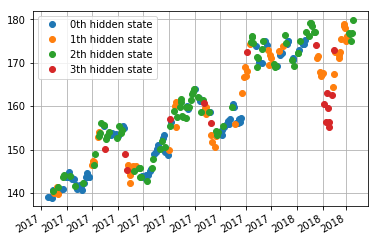

In [49]:
###############################################################################
# print trained parameters and plot
print("Transition matrix")
print(model.transmat_)
print()

print("means and vars of each hidden state")
for i in range(n_components):
    print("%dth hidden state" % i)
    print("mean = ", model.means_[i])
    print("var = ", np.diag(model.covars_[i]))
    print()

years = YearLocator()   # every year
months = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y')
fig = pl.figure()
ax = fig.add_subplot(111)

for i in range(n_components):
    # use fancy indexing to plot data in each state
    idx = (hidden_states == i)
    ax.plot_date(dates[idx], close_v[idx], 'o', label="%dth hidden state" % i)
ax.legend()

# format the ticks
ax.xaxis.set_major_locator(months)
# ax.xaxis.set_major_formatter(monthsFmt)
ax.xaxis.set_minor_locator(months)
ax.autoscale_view()

# format the coords message box
ax.fmt_xdata = DateFormatter('%Y-%m-%d')
ax.fmt_ydata = lambda x: '$%1.2f' % x
ax.grid(True)

fig.autofmt_xdate()
pl.show()